This script is to add data general. 
Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import warnings
warnings.filterwarnings('ignore')

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df

from message_ix.tools.add_dac import add_dac
from message_ix.tools.add_dac import get_report


%matplotlib inline

mp = ixmp.Platform()


<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


This part is just to generate a dummy scenario as basis for adding technology parameters. Need to be removed once integrated

In [2]:
base = message_ix.Scenario(
    mp, model="GENIE_sandbox_daccstest", scenario="nodaccs_baseline",
)

In [3]:

scen = base.clone(
    "GENIE_sandbox_daccstest",
    "nodaccs_emission_bound1000",
    "introducing the add_tech feature on MESSAGEix", 
    keep_solution=False, 
)
scen.check_out()

year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")

In [4]:
# add emission bound
scen.add_par('bound_emission', ['World', 'TCE_CO2', 'all', 'cumulative'], value=2421.17, unit="tC")

## Run the model and get the report

In [5]:
scen.commit(comment="Copy and run baseline scenario")
scen.set_as_default()
scen.solve(solve_options={'barcrossalg': '2','scaind':'1'})
scen.var("OBJ")["lvl"]

4365688.0

We don't have DACCS technologies yet here, but in this new version, you can create report of any technologies you want to analyse. For example, you might want to see BECCS deployment. To do this, you can list all BECCS technologies in MESSAGE to get the aggregate values of BECCS-related results. Please see below:

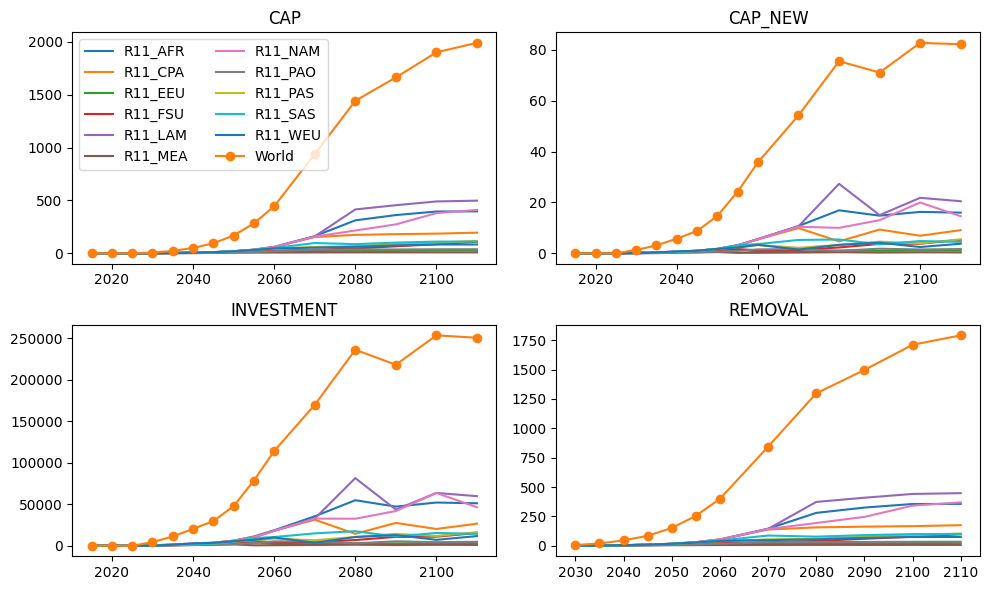

In [6]:
# Create list of technologies for get_report()
scenariotec = ['bio_istig_ccs','eth_bio_ccs','h2_bio_ccs','liq_bio_ccs']

# This is how you get the report
scenario_report = get_report(scen,scenariotec)

In [7]:
# scenario_report you get above is a dictionary of dataframes.
# for example, you can access the values using the key,
# such as "CAP" for Capacity. Now you can export this variable to
# excel or do other data manipulation operations

scenario_report["CAP"]

year_act,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2070,2080,2090,2100,2110
node_loc,,,,,,,,,,,,,,,
R11_AFR,0.0,0.0,0.0,0.932721,2.560887,5.403029,10.364301,19.024744,34.008942,59.925487,161.751232,311.546645,361.336125,395.070729,396.442163
R11_CPA,0.0,0.0,0.0,0.932721,2.560887,5.403029,10.364301,19.002482,33.954956,59.770412,153.434164,173.976124,180.892328,185.576128,194.807108
R11_EEU,0.0,0.0,0.0,0.932721,2.303193,4.392237,7.322437,11.550815,17.800268,19.652976,21.585583,22.637852,22.723236,25.844653,26.911195
R11_FSU,0.0,0.0,0.0,0.932721,2.560887,5.403029,8.871543,13.348799,20.654682,24.755203,33.019344,45.487317,65.937914,85.727746,108.718075
R11_LAM,0.0,0.0,0.0,0.932721,2.406734,5.135720,9.630685,17.605970,31.717001,57.228737,159.295846,414.609067,454.653055,490.343314,497.759174
R11_MEA,0.0,0.0,0.0,0.000000,0.272172,1.332631,2.890792,5.180243,5.963315,6.650667,7.615987,8.161530,8.087622,8.255744,8.076102
R11_NAM,0.0,0.0,0.0,0.000000,1.628166,5.403029,10.364301,19.002482,33.988326,59.823845,157.739877,215.221830,273.155515,379.710348,410.372261
R11_PAO,0.0,0.0,0.0,0.000000,0.932721,2.303193,4.316867,7.576090,12.130643,18.822775,32.708285,35.896995,35.829388,37.684129,38.214601
R11_PAS,0.0,0.0,0.0,0.932721,2.560887,5.285197,10.050199,18.422257,29.122645,43.582473,60.159027,67.890338,85.856508,100.795546,116.555453


## Close connection

In [8]:
mp.close_db()